Url: http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/ff636c2e-8d88-45f4-8ab7-bc2c95d59d41___Movie-scenes.jpg.jpeg
Annotations: 
  [{'x': 0.5523809523809524, 'y': 0.01800947867298578}, {'x': 0.6904761904761905, 'y': 0.10426540284360189}]
  [{'x': 0.24444444444444444, 'y': 0.26066350710900477}, {'x': 0.5555555555555556, 'y': 0.41232227488151657}]
  [{'x': 0.5428571428571428, 'y': 0.5222748815165876}, {'x': 0.7015873015873015, 'y': 0.6218009478672986}]
  [{'x': 0.2857142857142857, 'y': 0.7886255924170616}, {'x': 0.6904761904761905, 'y': 0.9639810426540284}]


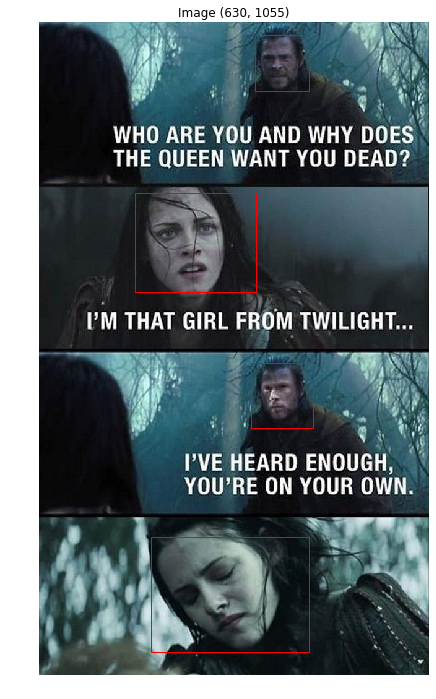

In [8]:
import json
import random as r
import requests
from io import BytesIO
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import matplotlib.patches as patches

%matplotlib inline


def print_image_data(js):
    print(f"Url: {js['content']}")
          
    print('Annotations: ')
    for ann in js['annotation']:
        print(f"  {ann['points']}")
#     Uncomment for additional information
#     print(f"Extras: {js['extras']}")
#     print('Metadata: ')
#     for k, v in js['metadata'].items():
#           print(f'  {k} - {v}')   

def scale_point(point, w, h):
    point['x'] *= w
    point['y'] *= h
  
def draw_image(image_data, show_faces=False):
    url = image_data['content']
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    size = img.size
    plt.figure(figsize=(12, 12))
    ax = plt.gca()
    if show_faces:
        width, height = size
        for ann in image_data['annotation']:
            bbox = ann['points']
            point1, point2 = bbox
            scale_point(point1, width, height)
            scale_point(point2, width, height)          
            left, upper, right, lower = point1['x'], point1['y'], point2['x'], point2['y']
            rect = patches.Rectangle((left,upper), right-left , lower-upper, linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
    plt.title(f'Image {size}')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    
annotation_path = './face_detection.json'
with open(annotation_path) as file:
    json_images = [json.loads(item) for item in file.readlines()]
n_images = len(json_images)
random_image = json_images[r.randint(0, n_images-1)]   
print_image_data(random_image)
draw_image(random_image, True)